In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# House Prices: Advanced Regression Techniques

### Step 1: Load the Datasets

For this competition, we will be using the following datasets:

- **train.csv**: The training dataset that contains the target variable `SalePrice` and features for various houses.
- **test.csv**: The test dataset that contains features for houses, but without the `SalePrice`. Our goal is to predict the `SalePrice` for these entries.
- **sample_submission.csv**: A file that provides a template for submission, containing columns `Id` and `SalePrice`.
- **data_description.txt**: This text file provides details about the features used in the dataset, which will guide our feature engineering and data analysis process.

We will load the necessary datasets (`train.csv`, `test.csv`, and `sample_submission.csv`) into pandas DataFrames for further exploration and model building.


In [4]:
# File paths
train_file_path = 'train.csv'
test_file_path = 'test.csv'
sample_submission_path = 'sample_submission.csv'
data_description_path = 'data_description.txt'

# Load the datasets
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)
sample_submission_df = pd.read_csv(sample_submission_path)

# Display the first few rows of each dataset
print("The training dataset:\n")
train_df.head()

The training dataset:



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print("The test dataset:\n")
test_df.head()

The test dataset:



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print("The sample submission dataframe:\n")
sample_submission_df.head()

The sample submission dataframe:



,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


### Step 2: Check the Shape of the Datasets

Before we begin our analysis, it's important to understand the size of the datasets we're working with. This can be done by checking the shape (number of rows and columns) of the training and test datasets.

- **train.csv**: The training dataset contains both features and the target variable `SalePrice`. We will use this data to train our models.
- **test.csv**: The test dataset contains only the features, and we need to predict the target variable for these entries.

Checking the shape of the datasets will give us a sense of how many entries (houses) we have in each set and how many features (variables) are present.


In [6]:
# Check the shape of the training and test datasets
print(f"Shape of the training dataset: {train_df.shape}")
print(f"Shape of the test dataset: {test_df.shape}")

Shape of the training dataset: (1460, 81)
Shape of the test dataset: (1459, 80)


#### Dataset Shapes:
- **Shape of the training dataset**: (1460 rows, 81 columns)
- **Shape of the test dataset**: (1459 rows, 80 columns)

This means that we have 1460 entries (houses) in the training set and 1459 entries in the test set. The training dataset includes 81 columns (80 features + the target variable `SalePrice`), while the test dataset has 80 columns (only features, without `SalePrice`).

### Step 3: Data Cleaning

Data cleaning is a crucial step before building machine learning models. In this step, we will:

1. **Check for missing values**: Missing data can affect model performance if not handled correctly. We'll identify features with missing values and decide on appropriate strategies to deal with them (e.g., imputation or removal).
2. **Check for duplicates**: Duplicate entries can skew the results and should be removed to ensure the integrity of the data.
3. **Handle outliers**: Outliers may distort the model's performance. We'll explore ways to detect and handle them appropriately.
4. **Data type consistency**: Ensure that all features are of the correct data type (e.g., numerical or categorical).
5. **Drop irrelevant or highly skewed features**: Some features may not provide useful information for model building, so we'll consider removing them if necessary.

We will begin by exploring missing values and checking for duplicates in the dataset.


In [7]:
# Check for missing values in the training dataset
missing_train = train_df.isnull().sum()
missing_train = missing_train[missing_train > 0].sort_values(ascending=False)
print(f"Missing values in training dataset:\n{missing_train}\n")


# Check for missing values in the test dataset
missing_test = test_df.isnull().sum()
missing_test = missing_test[missing_test > 0].sort_values(ascending=False)
print(f"Missing values in test dataset:\n{missing_test}\n")

Missing values in training dataset:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

Missing values in test dataset:
PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageCars         1
GarageArea     

In [8]:
# Percentage of missing data
missing_train_percentage = (missing_train / len(train_df)) * 100
missing_test_percentage = (missing_test / len(test_df)) * 100
print(f"Percentage of missing data in training dataset:\n{missing_train_percentage}\n")
print(f"Percentage of missing data in test dataset:\n{missing_test_percentage}\n")


Percentage of missing data in training dataset:
PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

Percentage of missing data in test dataset:
PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
MasVnrType      61.274846
FireplaceQu     50.034270
LotFrontage     15.558602
GarageCond       5.346127
GarageYrBlt      5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinT

### Step 4: Handling Missing Values

We will now handle missing values by:

1. **Dropping features with more than 80% missing values**, as they may not provide significant information for prediction.
2. **Imputing missing values** for both numerical and categorical features:
   - Numerical features will be filled with the median value.
   - Categorical features will be filled with the mode (most frequent value).

The following features will be dropped due to excessive missing values: `PoolQC`, `MiscFeature`, `Alley`, and `Fence`.


In [9]:
# Drop columns with more than 80% missing data
columns_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
train_df_cleaned = train_df.drop(columns=columns_to_drop, axis=1)
test_df_cleaned = test_df.drop(columns=columns_to_drop, axis=1)

# Impute missing values for numerical features with the median
numerical_features = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
train_df_cleaned[numerical_features] = train_df_cleaned[numerical_features].fillna(train_df_cleaned[numerical_features].median())
test_df_cleaned[numerical_features] = test_df_cleaned[numerical_features].fillna(test_df_cleaned[numerical_features].median())

# Impute missing values for categorical features with the mode
categorical_features = ['MasVnrType', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 
                        'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'Electrical']
train_df_cleaned[categorical_features] = train_df_cleaned[categorical_features].fillna(train_df_cleaned[categorical_features].mode().iloc[0])
test_df_cleaned[categorical_features] = test_df_cleaned[categorical_features].fillna(test_df_cleaned[categorical_features].mode().iloc[0])

# Verify that no missing values remain
print("Missing values in training dataset after cleaning:\n", train_df_cleaned.isnull().sum().sum())
print("Missing values in test dataset after cleaning:\n", test_df_cleaned.isnull().sum().sum())


Missing values in training dataset after cleaning:
 0
Missing values in test dataset after cleaning:
 22


### Step 5: Handling Remaining Missing Values in Test Dataset

Even after our initial cleaning, there are still some missing values in the test dataset. We will identify the columns that still have missing values and apply appropriate imputation strategies.


In [10]:
# Check remaining missing values in the test dataset
test_missing_values = test_df_cleaned.isnull().sum()
test_missing_values = test_missing_values[test_missing_values > 0]
print("Remaining missing values in test dataset:\n", test_missing_values)


Remaining missing values in test dataset:
 MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64


In [11]:
# Impute missing values for categorical columns with the mode
for col in ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'SaleType']:
    mode_value = test_df_cleaned[col].mode()[0]
    test_df_cleaned[col] = test_df_cleaned[col].fillna(mode_value)

# Impute missing values for numerical columns with the median
for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']:
    median_value = test_df_cleaned[col].median()
    test_df_cleaned[col] = test_df_cleaned[col].fillna(median_value)

# Check if all missing values are resolved
print("Remaining missing values after imputation:\n", test_df_cleaned.isnull().sum().sum())

# Verify that no missing values remain
print("Missing values in training dataset after cleaning:\n", train_df_cleaned.isnull().sum().sum())
print("Missing values in test dataset after cleaning:\n", test_df_cleaned.isnull().sum().sum())


Remaining missing values after imputation:
 0
Missing values in training dataset after cleaning:
 0
Missing values in test dataset after cleaning:
 0


### Step 7: Checking and Handling Duplicates

In this step, we will check for duplicate rows in both the training and test datasets. Duplicate rows can negatively impact model performance and should be handled appropriately.

In [12]:
# Check for duplicates in the training dataset
duplicates_train = train_df.duplicated().sum()
print(f"Number of duplicate rows in the training dataset: {duplicates_train}")

# Check for duplicates in the test dataset
duplicates_test = test_df.duplicated().sum()
print(f"Number of duplicate rows in the test dataset: {duplicates_test}")

Number of duplicate rows in the training dataset: 0
Number of duplicate rows in the test dataset: 0


### House Prices Exploratory Data Analysis (EDA)

In this section, we will perform Exploratory Data Analysis (EDA) to gain insights into the dataset. This includes visualizing feature distributions, examining relationships between features, and understanding factors influencing the target variable.

#### 1. Visualizing Feature Distributions

Since there are no missing values in the cleaned datasets, we will focus on visualizing feature distributions and relationships to guide model development.

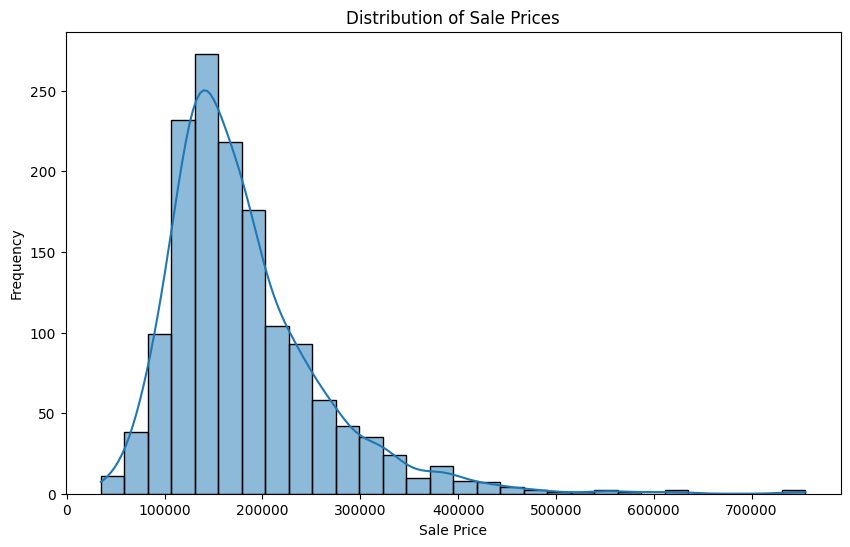

In [13]:
# Distribution of Sale Prices
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(train_df_cleaned['SalePrice'], kde=True, bins=30)
plt.title("Distribution of Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

## Examining Feature Relationships

To explore the relationships between features and understand their impact on the target variable, we use various visualization techniques.

### 1. Correlation Heatmap

A correlation heatmap helps to visualize the relationships between numerical features. It shows how each feature correlates with others and with the target variable. High correlation values (close to 1 or -1) indicate a strong relationship, while values close to 0 indicate a weak relationship.

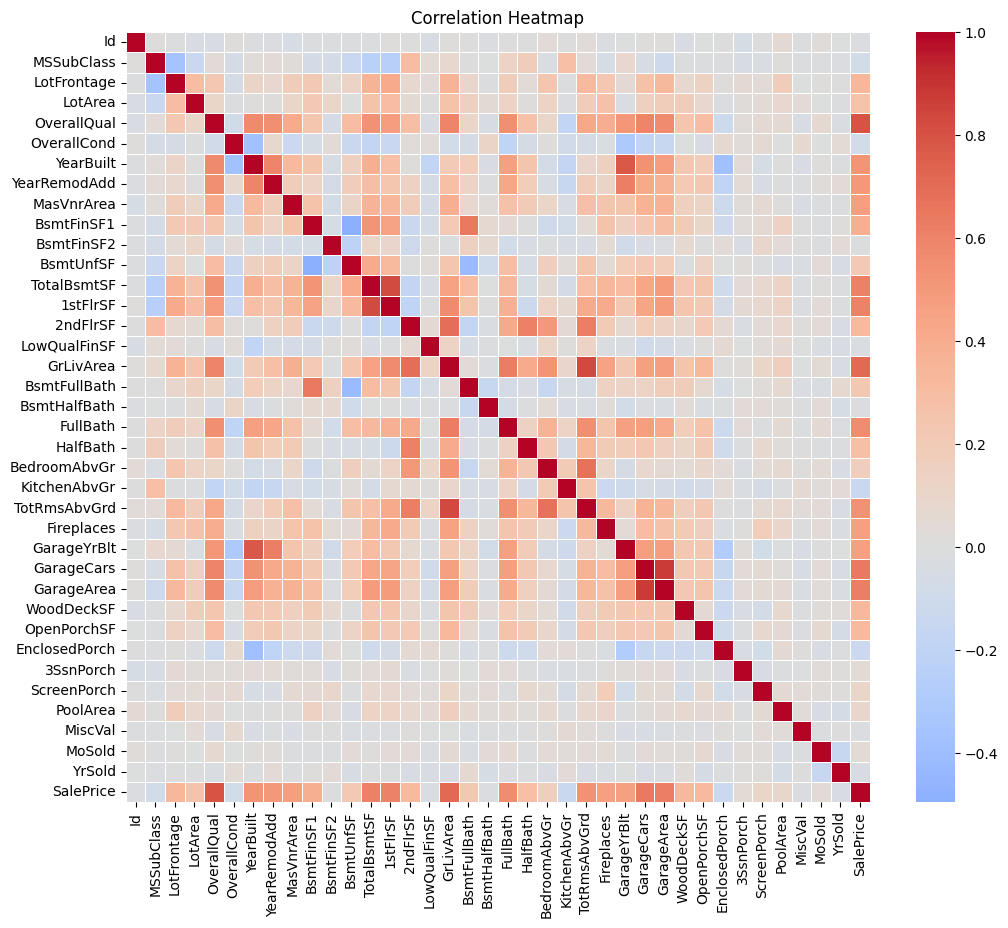

In [14]:
# Select only numeric columns from the DataFrame
numeric_cols = train_df_cleaned.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

### 2. Pair Plot

A pair plot visualizes the relationships between multiple features by creating scatter plots for each pair of features and histograms for individual features. This helps to identify patterns, correlations, and outliers in the data.


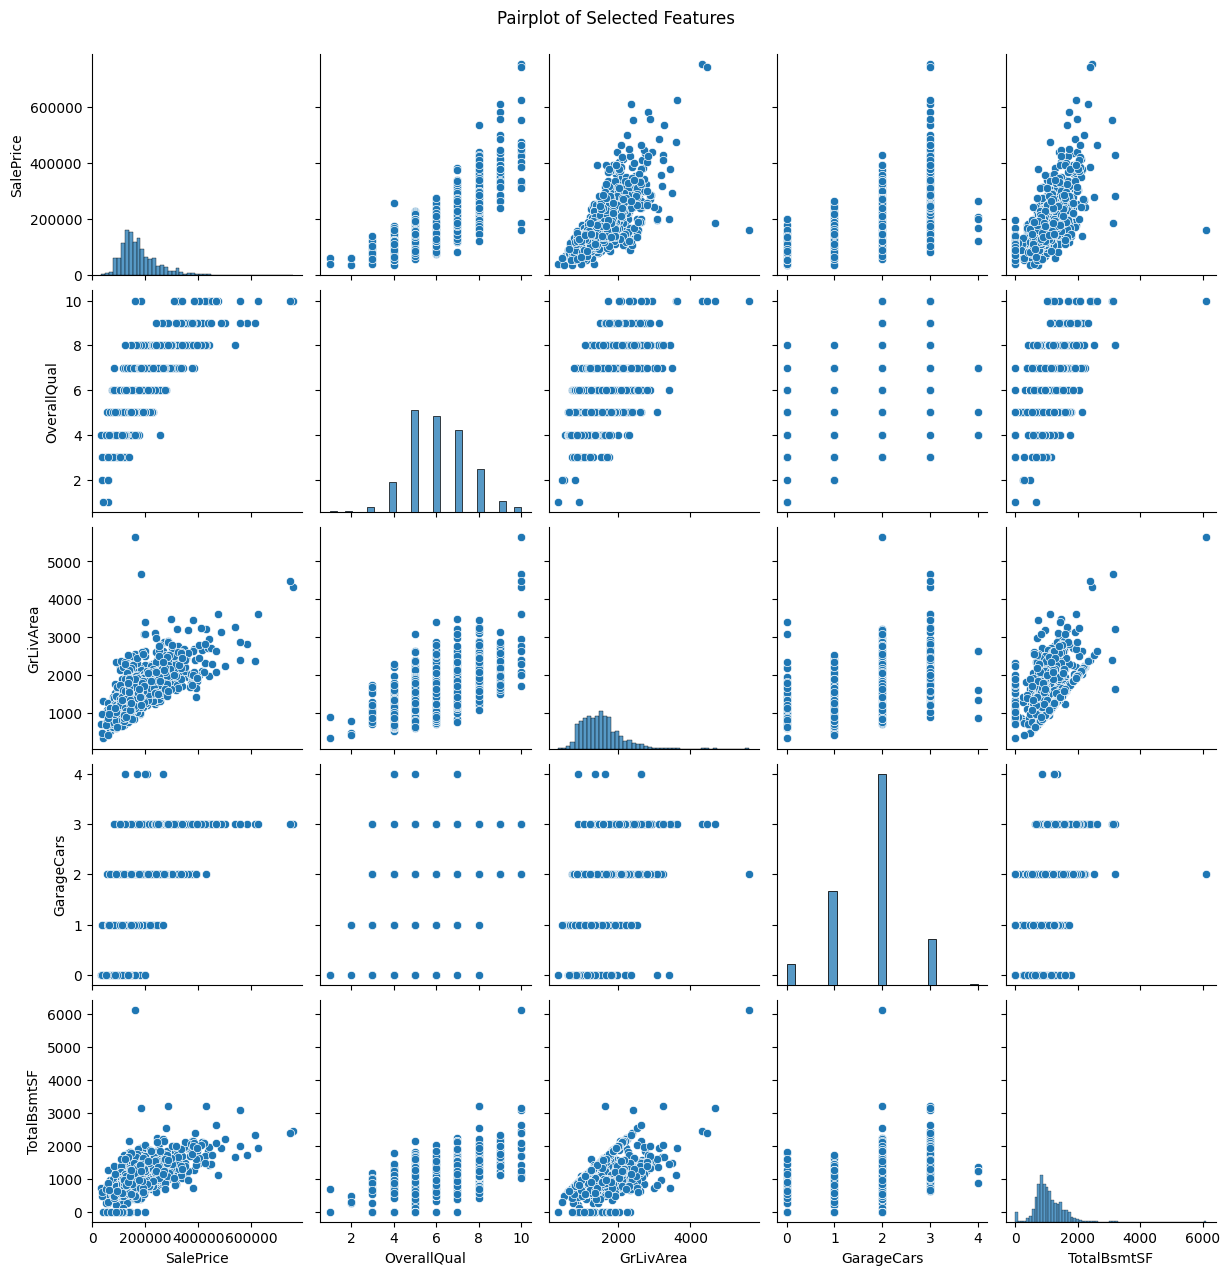

In [15]:
# Select a subset of features for pair plot
sns.pairplot(train_df_cleaned[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

### 3. t-SNE

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique that helps visualize high-dimensional data in 2D or 3D. It’s particularly useful for observing how features cluster together and can provide insights into the structure of the data.


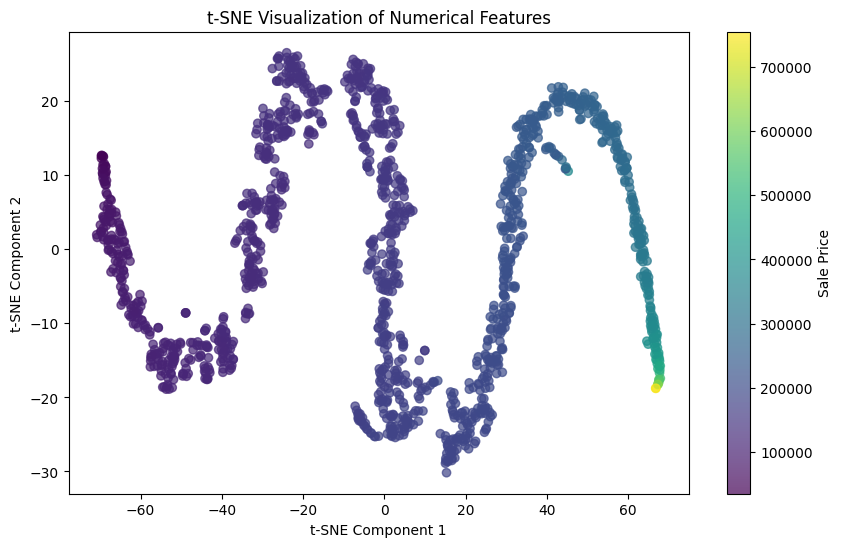

In [16]:
from sklearn.manifold import TSNE

# Select numerical features for t-SNE
numerical_features = train_df_cleaned.select_dtypes(include=[np.number])
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(numerical_features)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=train_df_cleaned['SalePrice'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Sale Price')
plt.title("t-SNE Visualization of Numerical Features")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


### 4. Stakeholder Visualization

Visualizations for stakeholders should be easily interpretable and provide clear insights into how certain features impact the sale price. One effective way to convey this information is by using bar plots or scatter plots to show the relationship between features and the target variable.


C:\Users\kalol\AppData\Local\Temp\ipykernel_23612\3685808869.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OverallQual', y='SalePrice', data=train_df_cleaned, palette='viridis')


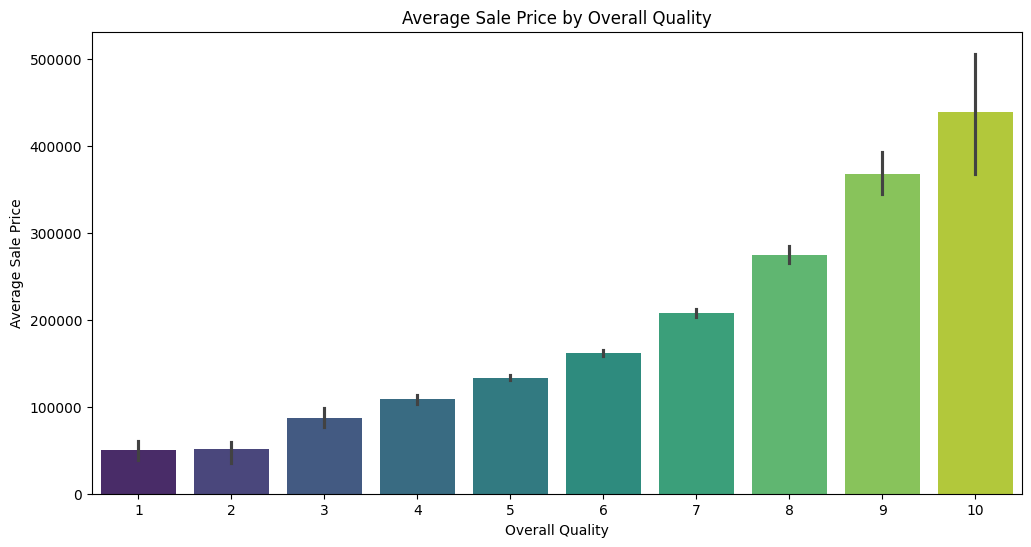

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x='OverallQual', y='SalePrice', data=train_df_cleaned, palette='viridis')
plt.title("Average Sale Price by Overall Quality")
plt.xlabel("Overall Quality")
plt.ylabel("Average Sale Price")
plt.show()


These visualizations help in understanding feature relationships and their impact on the target variable, aiding in feature selection and model interpretation.

## Feature Engineering and Model Training

### 1. Feature Engineering
Effective feature engineering can significantly improve model performance. Here are the steps to demonstrate effective tactics for feature engineering:

#### Linear Regression with Regularization
We'll explore linear regression models with different regularization methods to address multicollinearity and improve model performance:
- **LASSO Regression**: Applies L1 regularization to shrink some coefficients to zero.
- **ElasticNet Regression**: Combines L1 and L2 regularization.

#### Implementing LASSO Regression
LASSO regression helps in feature selection by penalizing less important features and avoiding multicollinearity.

#### XGBoost with Parameter Tuning
XGBoost is a powerful boosting method. We will perform parameter tuning to optimize its performance.

#### Ensemble Modeling
Ensemble methods combine predictions from multiple models to improve overall performance. We'll demonstrate stacking with:
- Gradient Boosting Machine (GBM)
- XGBoost
- Random Forest
- Neural Networks

### 2. Apply Different Transformations Before Training
Applying transformations such as scaling or logarithmic transformations can help in improving the performance of machine learning models.


In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, ElasticNet, RidgeCV
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Feature engineering and model training
# Define target and features
X = train_df_cleaned.drop(['SalePrice'], axis=1)
y = train_df_cleaned['SalePrice']

# Apply log transformation to SalePrice
y = np.log1p(y)

# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Model definitions
models = {
    'Lasso': Lasso(random_state=42),
    'ElasticNet': ElasticNet(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Create ensembling models
voting_regressor = VotingRegressor(estimators=[
    ('RandomForest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('XGBoost', XGBRegressor(n_estimators=200, max_depth=3, random_state=42))
])

stacking_regressor = StackingRegressor(
    estimators=[
        ('RandomForest', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('XGBoost', XGBRegressor(n_estimators=200, max_depth=3, random_state=42))
    ],
    final_estimator=RidgeCV()
)

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Training and evaluation for individual models
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_valid)
    rmse = np.sqrt(mean_squared_error(y_valid, preds))
    print(f'{name} RMSE: {rmse}')

# Training and evaluation for ensembling models
for name, model in {'VotingRegressor': voting_regressor, 'StackingRegressor': stacking_regressor}.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_valid)
    rmse = np.sqrt(mean_squared_error(y_valid, preds))
    print(f'{name} RMSE: {rmse}')

# Example: XGBoost parameter tuning
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5]
}

# Use the pipeline in GridSearchCV
grid_search = GridSearchCV(Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42))
]), param_grid, cv=3, scoring='neg_root_mean_squared_error')

grid_search.fit(X_train, y_train)
print("Best parameters for XGBoost:", grid_search.best_params_)
print("Best RMSE from grid search:", -grid_search.best_score_)

# Predict on the test set
X_test = test_df_cleaned.drop(['SalePrice'], axis=1, errors='ignore')  # Ensure 'SalePrice' is not in test_df_cleaned

# Ensure X_test has the same columns as X
X_test = X_test.reindex(columns=X.columns, fill_value=np.nan)

# Train the final model on the full training data
pipeline_final = Pipeline([
    ('preprocessor', preprocessor),
    ('model', stacking_regressor)  # Choose your best model here
])

pipeline_final.fit(X, y)  # Train on the entire dataset
test_preds = np.expm1(pipeline_final.predict(X_test))  # Reverse the log transformation

# Adjust the index of test_df_cleaned to start from 1461
test_df_cleaned.index = range(1461, 1461 + len(test_df_cleaned))

Lasso RMSE: 0.43324391618066094
ElasticNet RMSE: 0.43324391618066094
RandomForest RMSE: 0.14538824734861314
XGBoost RMSE: 0.1445745253760707
VotingRegressor RMSE: 0.13751147606869532
StackingRegressor RMSE: 0.13634570440636007
Best parameters for XGBoost: {'model__max_depth': 3, 'model__n_estimators': 200}
Best RMSE from grid search: 0.13522136511917487


### 3. Goal
The objective is to predict the sale price for each house in the test set. The predictions should be evaluated based on the Root Mean Squared Error (RMSE) between the logarithm of the predicted values and the logarithm of the observed sale prices.

### 4. Submission File Format
The submission file should have the following format:

In [22]:
# Create submission DataFrame
submission = pd.DataFrame({
    'Id': test_df_cleaned.index,
    'SalePrice': test_preds
})

# Save predictions
submission.to_csv('submission.csv', index=False)

print("Prediction completed and saved to 'submission.csv'")

Prediction completed and saved to 'submission.csv'
